In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Albedo_Map.csv', header=None)
df1 = pd.read_csv('LPFe_Map.csv', header=None)
df2 = pd.read_csv('LPK_Map.csv', header=None)
df3 = pd.read_csv('LPTh_Map.csv', header=None)
df4 = pd.read_csv('LPTi_Map.csv', header=None)

In [3]:
print(df.shape,df1.shape,df2.shape,df3.shape,df4.shape)

(360, 720) (360, 720) (360, 720) (360, 720) (360, 720)


## Task-1 Predicting the Lunar Albedo based on Chemical Composition

### Preprocessing Data

In [4]:
#function to normalise concentration maps
def normalising_data(dataframe1,dataframe2): 
        scaler_x = MinMaxScaler()
        scaler_x.fit(dataframe1)
        xscale=scaler_x.transform(dataframe1)
        scaler_y = MinMaxScaler()
        yarray=np.array(dataframe2)
        yarray.reshape((-1,1))
        print(scaler_y.fit(yarray))
        yscale=scaler_y.transform(yarray)
        return yscale, scaler_y , xscale , scaler_x

In [5]:
#function to split the data into training and test sets
def split_data(xscale,yscale):
    xscale = xscale.transpose()
    yscale = yscale.transpose()
    #print(xscale,yscale)
    xtrain, xtest, ytrain, ytest = train_test_split(xscale, yscale, shuffle=False,test_size=0.5)
    print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)
    return xtrain, xtest, ytrain, ytest

### Visualising original maps and scatterplots

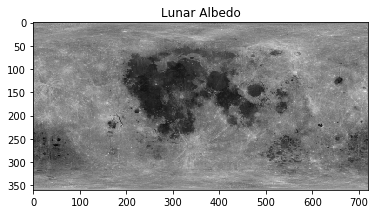

In [6]:
plt.imshow(df, cmap = "gray")
plt.title("Lunar Albedo")
plt.show()

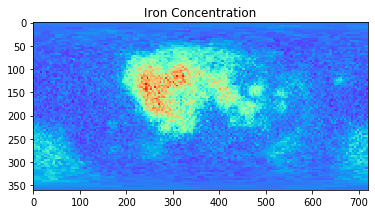

In [7]:
plt.imshow(df1, cmap = "rainbow")
plt.title("Iron Concentration")
plt.show()

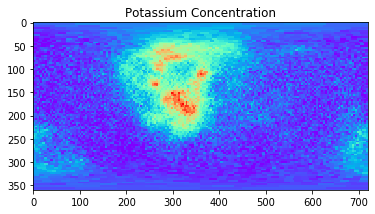

In [8]:
plt.imshow(df2, cmap = "rainbow")
plt.title("Potassium Concentration")
plt.show()

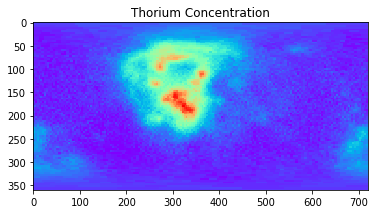

In [9]:
plt.imshow(df3, cmap = "rainbow")
plt.title("Thorium Concentration")
plt.show()

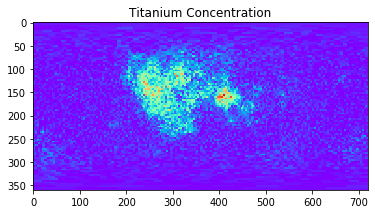

In [10]:
plt.imshow(df4, cmap = "rainbow")
plt.title("Titanium Concentration")
plt.show()

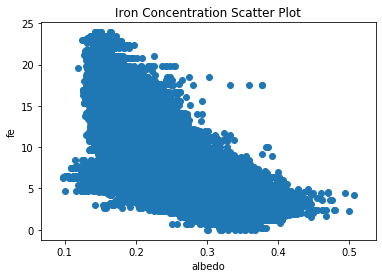

In [11]:
plt.scatter(df, df1)
plt.xlabel("albedo")
plt.ylabel("fe")
plt.title("Iron Concentration Scatter Plot")
plt.show()

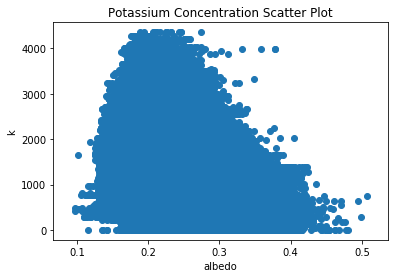

In [12]:
plt.scatter(df, df2)
plt.xlabel("albedo")
plt.ylabel("k")
plt.title("Potassium Concentration Scatter Plot")
plt.show()

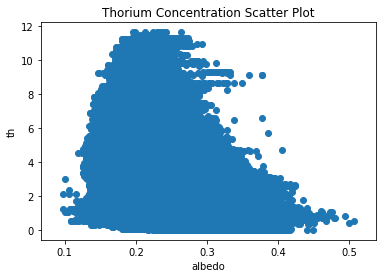

In [13]:
plt.scatter(df, df3)
plt.xlabel("albedo")
plt.ylabel("th")
plt.title("Thorium Concentration Scatter Plot")
plt.show()

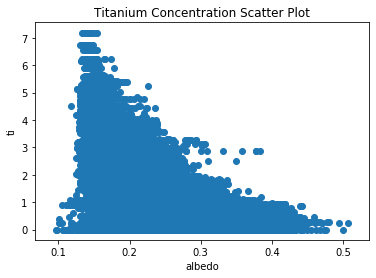

In [14]:
plt.scatter(df, df4)
plt.xlabel("albedo")
plt.ylabel("ti")
plt.title("Titanium Concentration Scatter Plot")
plt.show()

## Defining neural network structure for the model
### Using keras regression model 

In [15]:
def model_application(xtrain, xtest, ytrain, ytest):
    
    model = Sequential()
    model.add(Dense(12, input_shape=(360,), kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(360, activation='linear'))
    model.summary()
    model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
    history = model.fit(xtrain, ytrain, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)
    ypredicted= model.predict(xtest)
    
    return history,model,ypredicted

In [16]:
def visualise_performance(model,history,xtest,ytest):
    
    print(history.history.keys())
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    plt.scatter(xtest.transpose(),ytest.transpose())
    plt.scatter(xtest.transpose(),model.predict(xtest).transpose(),alpha=0.09)
    plt.legend(['original', 'predicted'], loc='upper left')
    plt.show()
    

In [17]:
def visualise_predictions(yorg,ynew):
    
    plt.imshow(yorg, cmap = "rainbow")
    plt.show()
    plt.imshow(ynew, cmap = "rainbow")
    plt.show()
    plt.hist(ytest)
    plt.show()
    plt.hist(ypredicted)
    plt.show() 

## Denormalising the data 

In [18]:
#denormalise data 
def denormalise(scaler_x,scaler_y ,xtrain, xtest, ytrain, ytest,ypredicted):
        
    xtrain = xtrain.transpose()
    xtest = xtest.transpose()
    xscale = np.hstack((xtrain, xtest))
    xorg = scaler_x.inverse_transform(xscale)
    
    ytrain = ytrain.transpose()
    ytest = ytest.transpose()
    yscale = np.hstack((ytrain,ytest))
    yorg = scaler_y.inverse_transform(yscale)
    ypredicted = ypredicted.transpose()
    ynew=np.hstack((ytrain,ypredicted))
    ynew=scaler_y.inverse_transform(ynew)
    
    return xorg, yorg, ytest,ypredicted, ynew

## Iron Concentration 

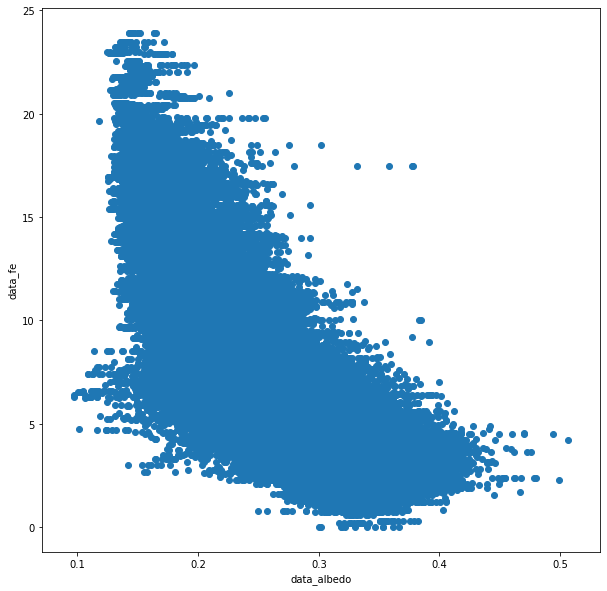

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(df,df1)
plt.xlabel("data_albedo")
plt.ylabel("data_fe")
plt.show()

In [20]:
yscale, scaler_y , xscale , scaler_x = normalising_data(df,df1)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [21]:
xtrain, xtest, ytrain, ytest = split_data(xscale,yscale)

(360, 360) (360, 360) (360, 360) (360, 360)


In [22]:
history , model , ypredicted = model_application(xtrain, xtest, ytrain, ytest)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                4332      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 360)               3240      
Total params: 7,676
Trainable params: 7,676
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
6/6 [==============================] - 1s 93ms/step - loss: 0.2267 - mse: 0.2267 - mae: 0.3950 - val_loss: 0.2043 - val_mse: 0.2043 - val_mae: 0.3501
Epoch 2/150
6/6 [==============================] - 0s 13ms/step - loss: 0.1997 - mse: 0.1997 - mae: 0.3705 - val_loss: 0.1999 - val_mse: 0.1999 - val_mae: 0.3432
Epoch 3/150
6/6 [==============================] - 0s 32ms/s

In [23]:
xorg , yorg , ytest ,ypredicted, ynew = denormalise(scaler_x,scaler_y ,xtrain, xtest, ytrain, ytest, ypredicted)

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


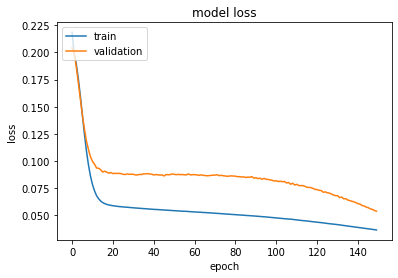

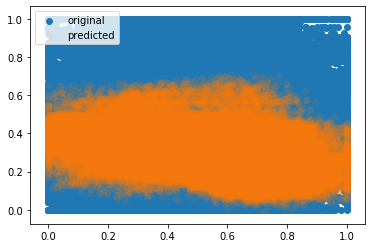

In [24]:
visualise_performance(model,history,xtest,ytest)

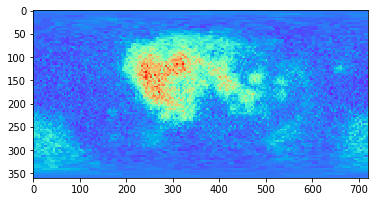

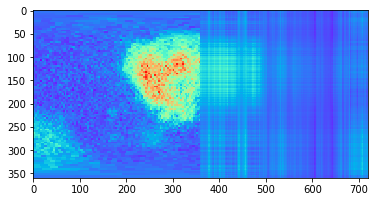

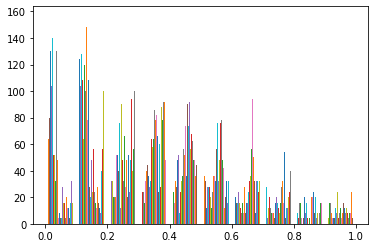

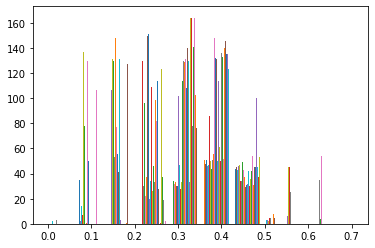

In [25]:
visualise_predictions(yorg,ynew)

## Potassium Concentration

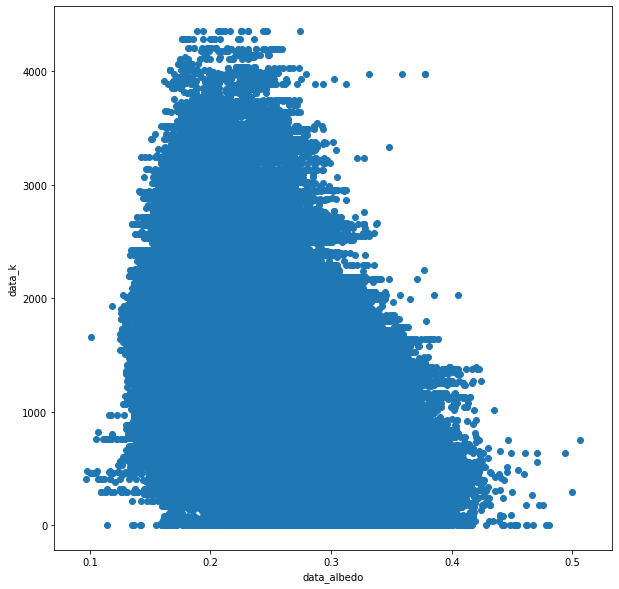

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(df,df2)
plt.xlabel("data_albedo")
plt.ylabel("data_k")
plt.show()

In [27]:
yscale, scaler_y , xscale , scaler_x = normalising_data(df,df2)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [28]:
xtrain, xtest, ytrain, ytest = split_data(xscale,yscale)

(360, 360) (360, 360) (360, 360) (360, 360)


In [29]:
history , model , ypredicted = model_application(xtrain, xtest, ytrain, ytest)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                4332      
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 360)               3240      
Total params: 7,676
Trainable params: 7,676
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
6/6 [==============================] - 0s 35ms/step - loss: 0.2191 - mse: 0.2191 - mae: 0.3932 - val_loss: 0.2405 - val_mse: 0.2405 - val_mae: 0.4048
Epoch 2/150
6/6 [==============================] - 0s 55ms/step - loss: 0.2054 - mse: 0.2054 - mae: 0.3781 - val_loss: 0.2254 - val_mse: 0.2254 - val_mae: 0.3897
Epoch 3/150
6/6 [==============================] - 0s 12ms

In [30]:
xorg , yorg , ytest ,ypredicted, ynew = denormalise(scaler_x,scaler_y ,xtrain, xtest, ytrain, ytest, ypredicted)

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


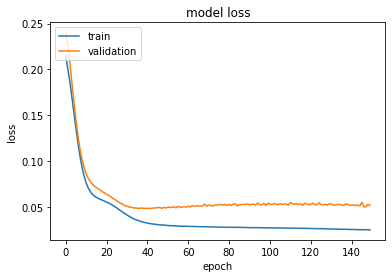

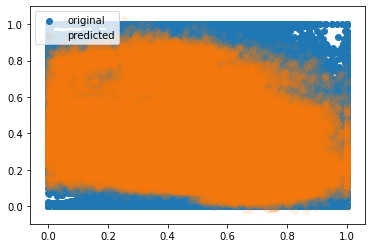

In [31]:
visualise_performance(model,history,xtest,ytest)

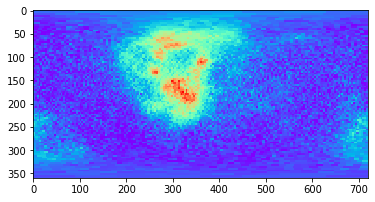

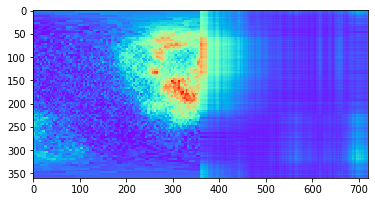

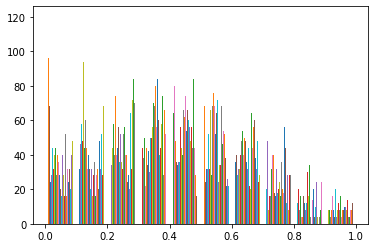

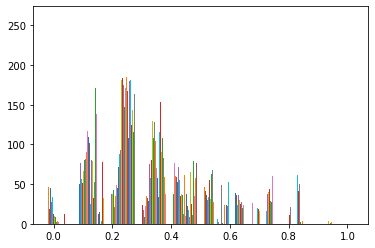

In [32]:
visualise_predictions(yorg,ynew)

## Thorium Concentration 

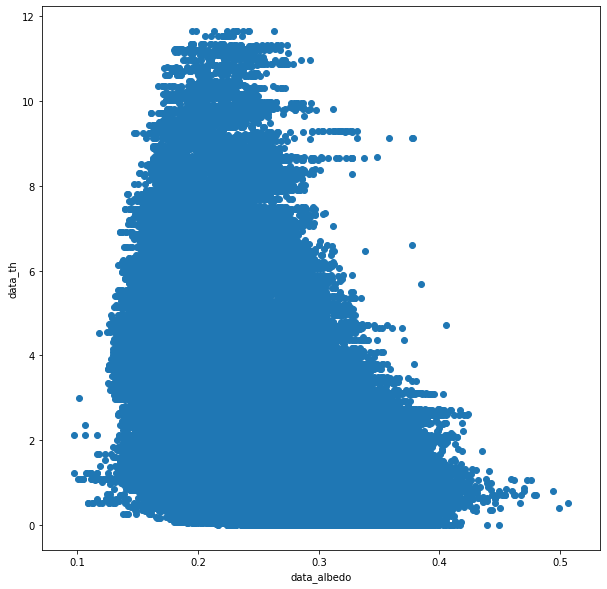

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(df,df3)
plt.xlabel("data_albedo")
plt.ylabel("data_th")
plt.show()

In [34]:
yscale, scaler_y , xscale , scaler_x = normalising_data(df,df3)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [35]:
xtrain, xtest, ytrain, ytest = split_data(xscale,yscale)

(360, 360) (360, 360) (360, 360) (360, 360)


In [36]:
history , model , ypredicted = model_application(xtrain, xtest, ytrain, ytest)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                4332      
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 360)               3240      
Total params: 7,676
Trainable params: 7,676
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
6/6 [==============================] - 1s 46ms/step - loss: 0.2304 - mse: 0.2304 - mae: 0.3967 - val_loss: 0.2191 - val_mse: 0.2191 - val_mae: 0.3633
Epoch 2/150
6/6 [==============================] - 0s 23ms/step - loss: 0.2199 - mse: 0.2199 - mae: 0.3832 - val_loss: 0.2122 - val_mse: 0.2122 - val_mae: 0.3577
Epoch 3/150
6/6 [==============================] - 0s 20ms

In [37]:
xorg , yorg , ytest ,ypredicted, ynew = denormalise(scaler_x,scaler_y ,xtrain, xtest, ytrain, ytest, ypredicted)

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


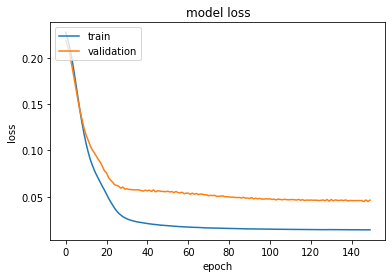

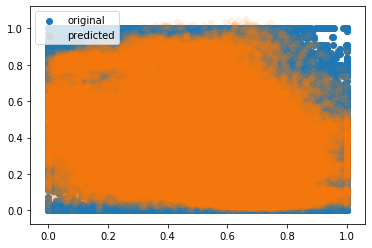

In [38]:
visualise_performance(model,history,xtest,ytest)

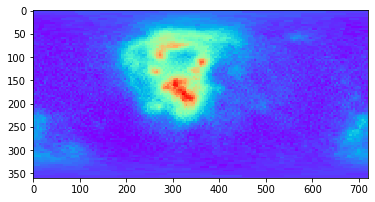

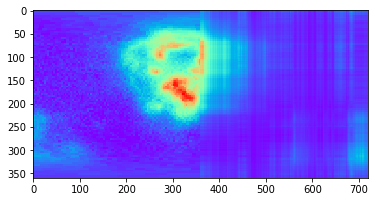

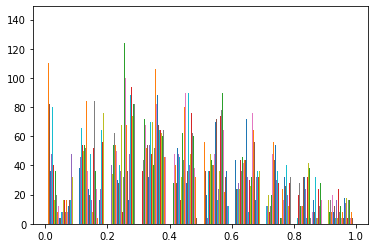

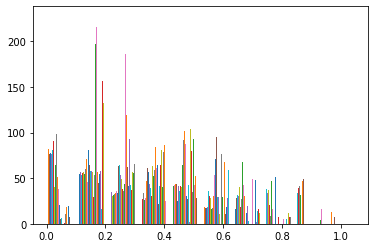

In [39]:
visualise_predictions(yorg,ynew)

## Titanium Concentration 

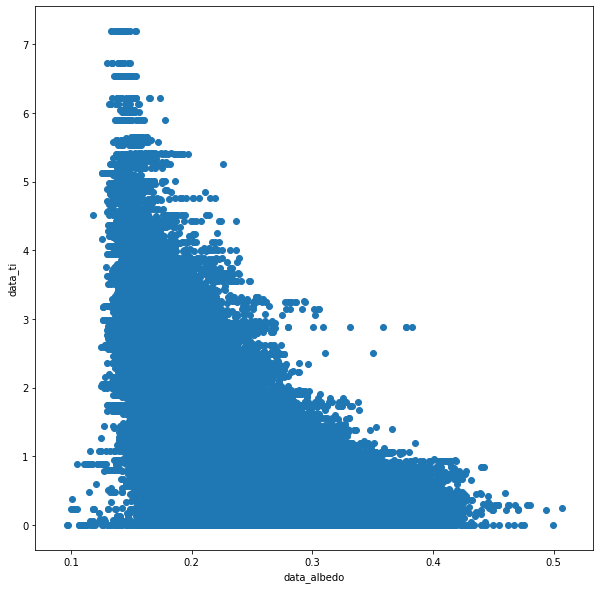

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(df,df4)
plt.xlabel("data_albedo")
plt.ylabel("data_ti")
plt.show()

In [41]:
yscale, scaler_y , xscale , scaler_x = normalising_data(df,df4)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [42]:
xtrain, xtest, ytrain, ytest = split_data(xscale,yscale)

(360, 360) (360, 360) (360, 360) (360, 360)


In [43]:
history , model , ypredicted = model_application(xtrain, xtest, ytrain, ytest)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 12)                4332      
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_11 (Dense)             (None, 360)               3240      
Total params: 7,676
Trainable params: 7,676
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
6/6 [==============================] - 0s 34ms/step - loss: 0.1062 - mse: 0.1062 - mae: 0.2287 - val_loss: 0.1189 - val_mse: 0.1189 - val_mae: 0.2424
Epoch 2/150
6/6 [==============================] - 0s 11ms/step - loss: 0.1003 - mse: 0.1003 - mae: 0.2204 - val_loss: 0.1126 - val_mse: 0.1126 - val_mae: 0.2354
Epoch 3/150
6/6 [==============================] - 0s 12ms

In [44]:
xorg , yorg , ytest ,ypredicted, ynew = denormalise(scaler_x,scaler_y ,xtrain, xtest, ytrain, ytest, ypredicted)

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


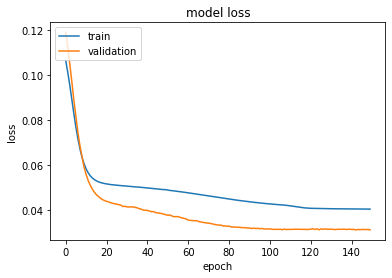

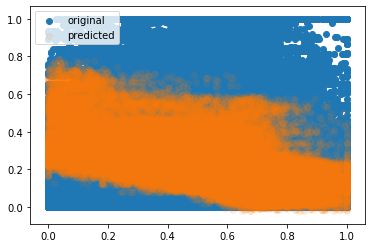

In [45]:
visualise_performance(model,history,xtest,ytest)

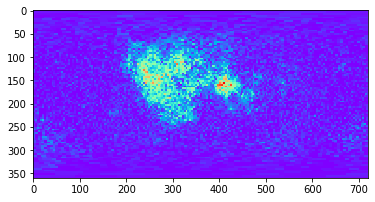

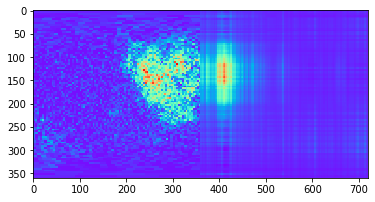

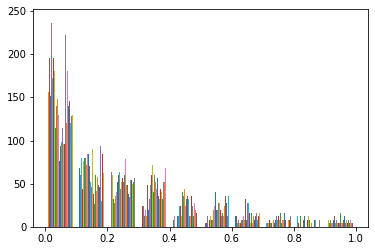

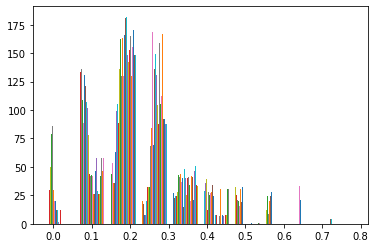

In [46]:
visualise_predictions(yorg,ynew)

#### Deductions 
* Deep Learning Model performs fairly well but in future we can explore more regression models like linear regression and SVR model.
* Better Visualisation of graphs (scaling teachniques)
* Remove image plot distortions for predicted values (ynew)
* Optimise deep learning models for better predictions
* Try more regression algorithms and observe perforamance comparisons